# Building A Web Based Data Visualization wit Dash - Plotly

## Using the Ontario School and Under 20 Ont COVID-19 Data sets

#### By: Peter Stangolis

## Import required libraries

In [30]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [31]:
df = pd.read_csv("ont_school_covid19_101.csv")
df.head()

,reported_date,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases
0,2020-09-11,13,0,4828,0,0,0,NaN,NaN,13,4,9,NaN
1,2020-09-14,15,0,4828,2,1,1,NaN,NaN,15,5,10,NaN
2,2020-09-15,27,0,4828,14,4,4,6.0,NaN,29,9,14,6.0
3,2020-09-16,35,0,4828,12,6,4,2.0,NaN,41,15,18,8.0
4,2020-09-17,51,1,4828,21,5,4,12.0,NaN,62,20,22,20.0


In [32]:
cols = [x for x in df.columns]

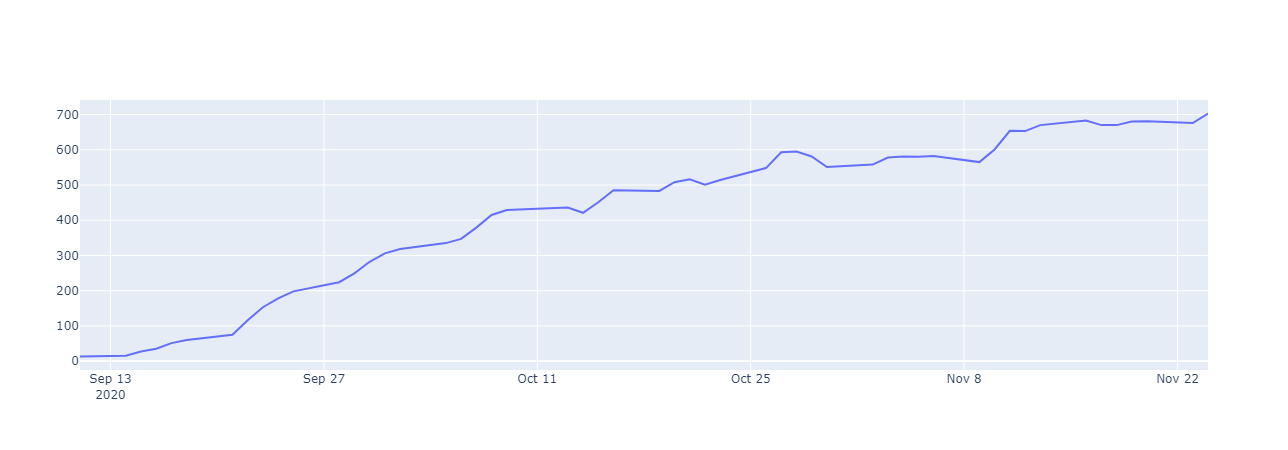

In [38]:
selection = ['current_schools_w_cases', 'cumulative_school_related_cases', 'cumulative_school_related_student_cases', 'cumulative_school_related_staff_cases']

fig = go.Figure([go.Scatter(x=df['reported_date'], y=df['current_schools_w_cases'])])
fig.show()

In [74]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

df = pd.read_csv("ont_school_covid19_101.csv")

selection = ['current_schools_w_cases', 'cumulative_school_related_cases', 'cumulative_school_related_student_cases', 'cumulative_school_related_staff_cases']


app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children="Cumulative COVID-19 Cases in Ont. Schools"),
    dcc.Dropdown(
        id="ticker",
        options=[{"label": x, "value": x} 
                 for x in selection],
        value=df.columns[1],
        clearable=False,
    ),
    
    dcc.Graph(id="time-series-chart"
             ),
])


@app.callback(
    Output("time-series-chart", "figure"), 
    [Input("ticker", "value")])
def display_time_series(ticker):
    fig = px.line(df, x = 'reported_date', y = ticker)
    #fig = go.Figure([go.Scatter(x=df['reported_date'], y=ticker)])
    #fig.update_xaxes(rangeslider_visible=True)
    return fig





app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

In [75]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}


app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Ontario School COVID-19 Cases',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(children='Dash: A web application framework for Python.', 
        style={
            'textAlign': 'center',
            'color': colors['text']
    }),
    
    dcc.Dropdown(
        id="ticker",
        options=[{"label": x, "value": x} 
                 for x in selection
                ],
        value=df.columns[1],
        clearable=False
    ),

    dcc.Graph(
        id='time-series-chart',
        figure=fig
    )
])


@app.callback(
    Output("time-series-chart", "figure"), 
    [Input("ticker", "value")])

def display_time_series(ticker):
    fig = px.line(df, x = 'reported_date', y = ticker)
    #fig = go.Figure([go.Scatter(x=df['reported_date'], y=ticker)])
    #fig.update_xaxes(rangeslider_visible=True)
    return fig



app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run